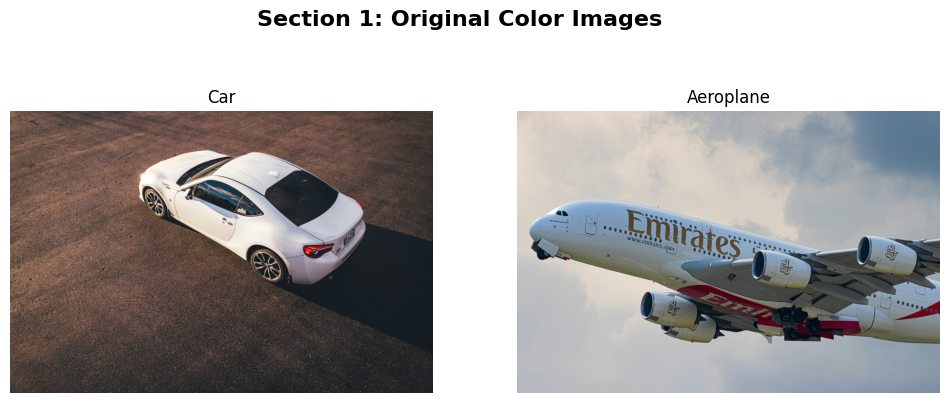

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# --- LOAD IMAGES ---
# Loading images into variables as requested
img1_bgr = cv2.imread('car.jpg')
img2_bgr = cv2.imread('aeroplane.jpg')

# Check if images are loaded
if img1_bgr is None or img2_bgr is None:
    print("Error: Could not load images. Check your filenames!")
else:
    # Function to display comparison
    def show_comparison(image_left, image_right, title):
        plt.figure(figsize=(12, 5))
        plt.suptitle(title, fontsize=16, fontweight='bold')
        
        plt.subplot(1, 2, 1)
        plt.imshow(image_left, cmap='gray' if len(image_left.shape) == 2 else None)
        plt.title("Car")
        plt.axis('off')
        
        plt.subplot(1, 2, 2)
        plt.imshow(image_right, cmap='gray' if len(image_right.shape) == 2 else None)
        plt.title("Aeroplane")
        plt.axis('off')
        
        plt.show()

    # --- SECTION 1: ORIGINAL COLOR ---
    img1_rgb = cv2.cvtColor(img1_bgr, cv2.COLOR_BGR2RGB)
    img2_rgb = cv2.cvtColor(img2_bgr, cv2.COLOR_BGR2RGB)
    show_comparison(img1_rgb, img2_rgb, "Section 1: Original Color Images")

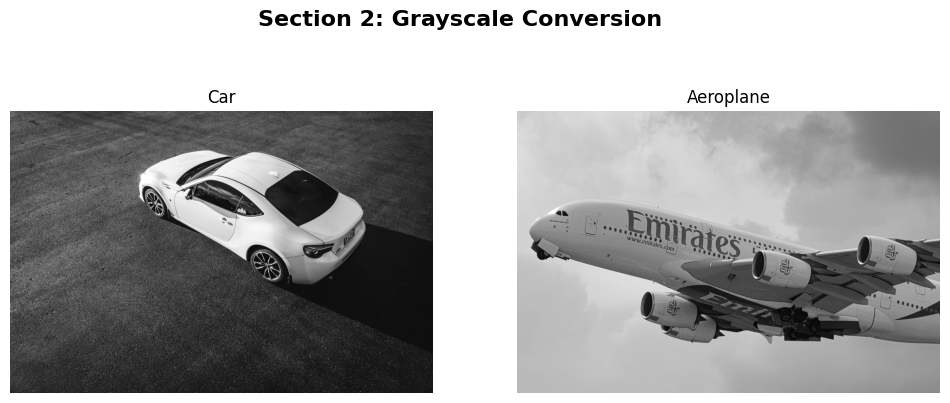

In [11]:
    # --- SECTION 2: GRAYSCALE CONVERSION ---
    img1_gray = cv2.cvtColor(img1_bgr, cv2.COLOR_BGR2GRAY)
    img2_gray = cv2.cvtColor(img2_bgr, cv2.COLOR_BGR2GRAY)
    show_comparison(img1_gray, img2_gray, "Section 2: Grayscale Conversion")

C:\Users\acer\AppData\Local\Temp\ipykernel_9280\1403843637.py:5: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(img1_gray.ravel(), 256, [0, 256], color='blue', alpha=0.7)
C:\Users\acer\AppData\Local\Temp\ipykernel_9280\1403843637.py:9: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(img2_gray.ravel(), 256, [0, 256], color='green', alpha=0.7)


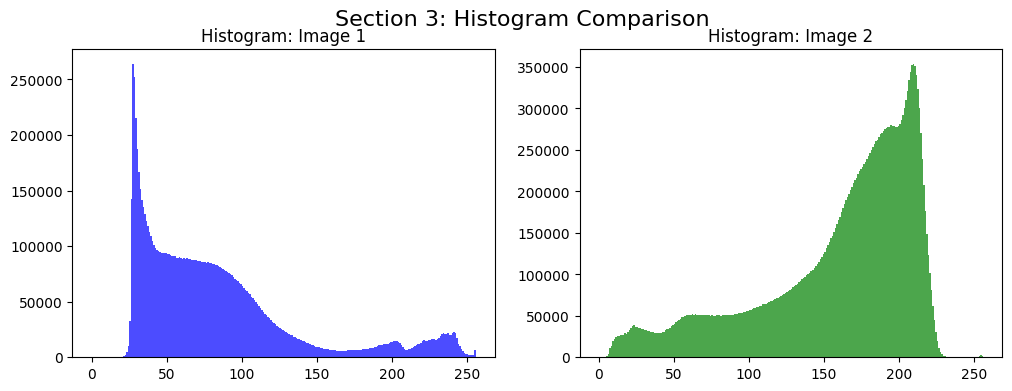

In [12]:
    # --- SECTION 3: HISTOGRAM VISUALIZATION ---
    plt.figure(figsize=(12, 4))
    plt.suptitle("Section 3: Histogram Comparison", fontsize=16) 
    plt.subplot(1, 2, 1)
    plt.hist(img1_gray.ravel(), 256, [0, 256], color='blue', alpha=0.7)
    plt.title("Histogram: Image 1")
    
    plt.subplot(1, 2, 2)
    plt.hist(img2_gray.ravel(), 256, [0, 256], color='green', alpha=0.7)
    plt.title("Histogram: Image 2")
    plt.show()

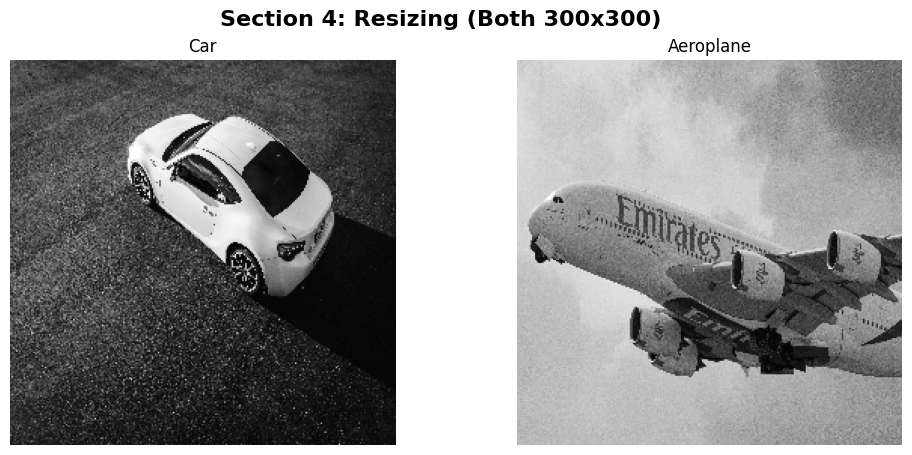

In [13]:
    # --- SECTION 4: IMAGE RESIZING ---
    img1_resized = cv2.resize(img1_gray, (256, 256))
    img2_resized = cv2.resize(img2_gray, (256, 256))
    show_comparison(img1_resized, img2_resized, "Section 4: Resizing")

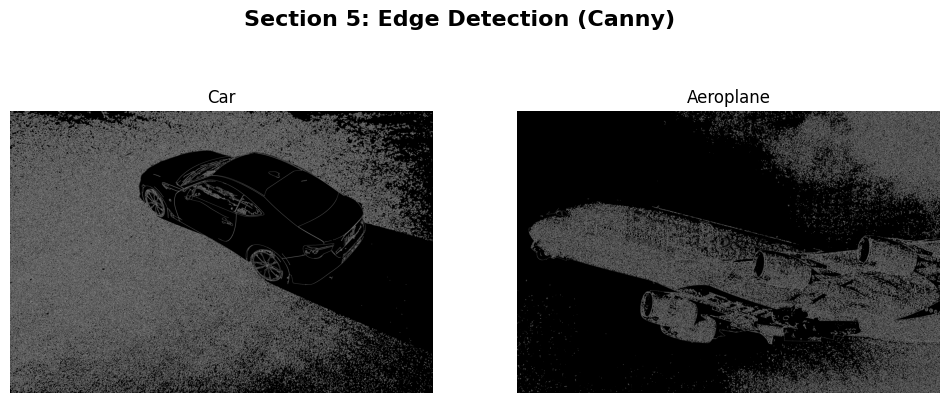

In [18]:
    # --- SECTION 5: EDGE DETECTION ---
    edges1 = cv2.Canny(img1_gray, 50, 200)
    edges2 = cv2.Canny(img2_gray, 50, 200)
    show_comparison(edges1, edges2, "Section 5: Edge Detection (Canny)") 

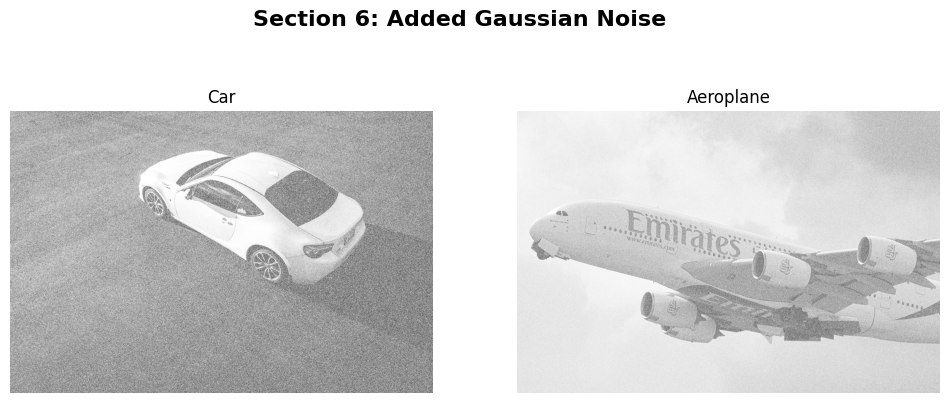

In [15]:
    # --- SECTION 6: NOISE ADDITION ---
    # Create random Gaussian noise for both
    noise1 = np.random.normal(0, 25, img1_gray.shape).astype('uint8')
    noise2 = np.random.normal(0, 25, img2_gray.shape).astype('uint8')
    img1_noisy = cv2.add(img1_gray, noise1)
    img2_noisy = cv2.add(img2_gray, noise2)
    show_comparison(img1_noisy, img2_noisy, "Section 6: Added Gaussian Noise")

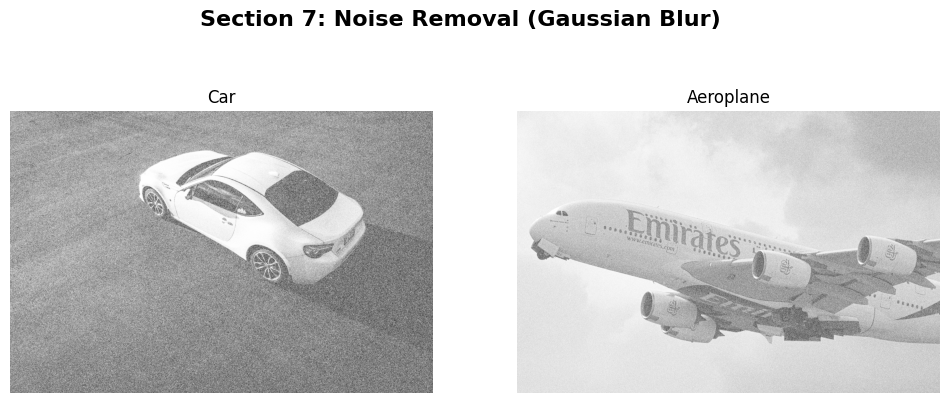

In [16]:
    # --- SECTION 7: NOISE REMOVAL ---
    # Apply Gaussian Filter (Smoothing)
    img1_denoised = cv2.GaussianBlur(img1_noisy, (5, 5), 0)
    img2_denoised = cv2.GaussianBlur(img2_noisy, (5, 5), 0)
    show_comparison(img1_denoised, img2_denoised, "Section 7: Noise Removal (Gaussian Blur)")

Task 2:

Dataset: PCAM (PatchCamelyon)
The PatchCamelyon dataset is a large-scale histological dataset used to identify metastatic tissue in lymph nodes. It is often used to train models for automated cancer detection in pathology labs.

a. Type of Imaging Data: Histopathologic color images

b. Number of Images: 327,680 patches (96x96 pixels each)

c. Available Classes or Labels:
   Binary classification
   1. Positive: Contains tumor.
   2. Negative: Contains no tumor.

d. Dataset Imbalance: balanced

e. Observed Challenges: Staining Variations: Images have different stainings, leading to color inconsistencies that can confuse AI models.

Dataset: CQ500 (Head CT for Trauma)
The CQ500 dataset was specifically curated to evaluate AI performance on head injuries and hemorrhages, typical of an emergency room setting.

a. Type of Imaging Data: CT scans

b. Number of Images: 4311

c. Available Classes or Labels: Scans are annotated for three main types of brain injuries:
1. Intracranial Hemorrhage.
2. Skull Fractures.
3. Midline Shift.

d. Dataset Imbalance: This dataset is highly imbalanced toward positive pathology.